In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [6]:
# 2. 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [7]:
window = 12
X, y = [], []
for i in range(len(data_scaled)-window):
    X.append(data_scaled[i:i+window])
    y.append(data_scaled[i+window])
X, y = np.array(X), np.array(y)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.fit(X, y, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1223
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0058
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0072
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0074
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0071


In [10]:
y_pred_scaled = model.predict(X)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_real = scaler.inverse_transform(y)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


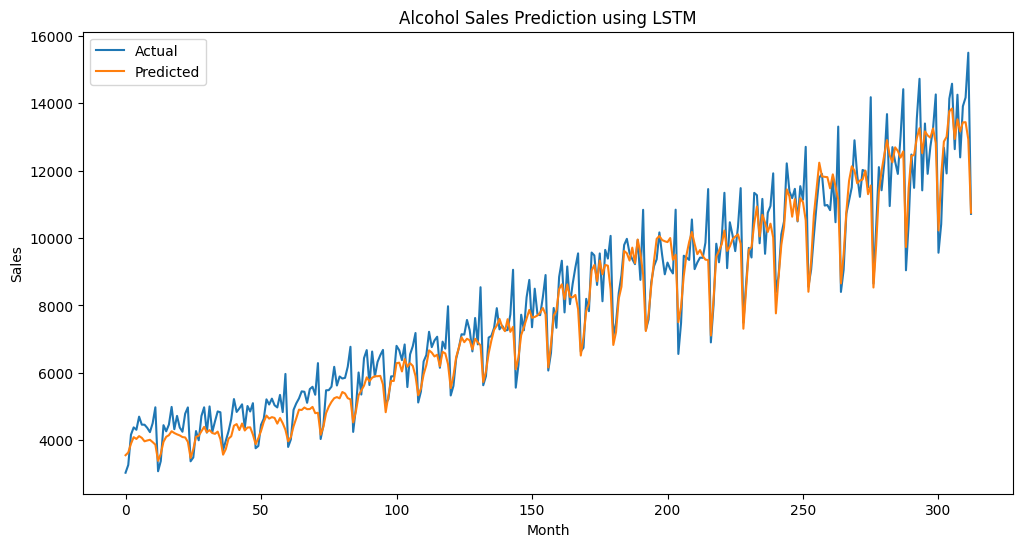

In [11]:
plt.figure(figsize=(12,6))
plt.plot(y_real, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Alcohol Sales Prediction using LSTM')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()